In [1]:
import pandas as pd
import sys
sys.path.append("..")
from tools.feature_selection import feat_select
from tools import data_parser as dp

In [2]:
bert_data = "../data/combined_bert_df.csv"
df = pd.read_csv(bert_data)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
Y = temp

In [3]:
reduced_data = feat_select(X,Y,100)

In [5]:
reduced_data.shape

(177, 100)

In [6]:
reduced_data

array([[ -66.82945   ,  -29.14194   ,   26.443787  , ...,  159.97913   ,
          13.266889  ,  101.22186   ],
       [  -2.1962323 ,   84.637405  ,   63.094994  , ...,   47.22009   ,
          10.331673  ,   36.679665  ],
       [ -74.65288   ,   31.603592  ,   23.305748  , ...,  -32.365753  ,
          54.983738  ,   25.96179   ],
       ...,
       [-123.724945  ,  184.61896   ,  -18.981827  , ...,  -49.204285  ,
           1.5628223 ,   -0.36485767],
       [-113.38853   ,  -76.434875  ,  -66.99424   , ...,   78.62278   ,
          55.832733  ,  -23.999693  ],
       [-120.013565  ,  218.1726    ,  -42.72741   , ...,  -38.379494  ,
          77.779526  ,    9.302487  ]])

In [48]:
from sklearn.model_selection import train_test_split
from randomforest import random_forest_CV
import joblib
import numpy as np

In [31]:
x_train, x_test, y_train, y_test = train_test_split(reduced_data, Y, test_size=0.1, random_state = 7)

In [32]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = [1.0, 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [33]:
model = random_forest_CV.grid_search(x_train,y_train,random_grid,100,3)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [34]:
result = random_forest_CV.eval_model(model,x_test,y_test)
print (result)

Model Performance
---------------------
Average Error: 4.02 degrees.
(4.018190684627044, 0.7137548492818366)


In [38]:
random_forest_CV.save_result(model,'100D_combined_bert','Random Forest Regression with GridSearchCV','../models/120323_RF.joblib',0.71)

C:\Users\toon_\git\AntibodyFvTm50Predictor\jupyter\..\randomforest\random_forest_CV.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_data)


TypeError: Can only append a dict if ignore_index=True

In [39]:
from data_visualisation import rf_vis

AttributeError: 'function' object has no attribute 'savefig'

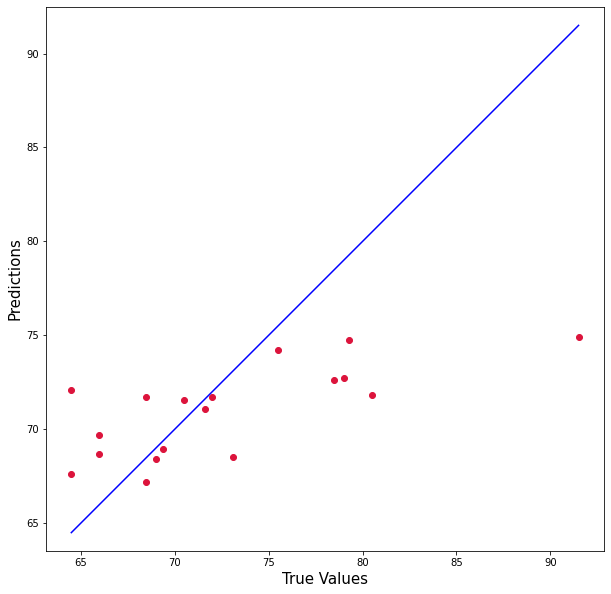

In [40]:
rf_vis.rf_plot(x_test,y_test,model)

In [49]:
random_forest_CV.compare_to_avg(model,x_test,y_test)

Model Performance
---------------------
Average Error: 4.02 degrees.


'Model error  : 4.02 C\nAverage error: 5.42 C\nImprovement  : 25.85%'